# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Importing Dataset

In [2]:
df_apr14 = pd.read_csv('D:\data_apr14.csv')
df_may14 = pd.read_csv('D:\data_may14.csv')
df_jun14 = pd.read_csv('D:\data_jun14.csv')
df_jul14 = pd.read_csv('D:\data_jul14.csv')
df_aug14 = pd.read_csv('D:\data_aug14.csv')
df_sep14 = pd.read_csv('D:\data_sep14.csv')

#merging Multiple DataFrame into one DataFrame
df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14],ignore_index=True)

# Data Preparation

In [3]:
df.head()

,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date/Time   object 
 2   Lat         float64
 3   Lon         float64
 4   Base        object 
dtypes: float64(2), int64(1), object(2)
memory usage: 173.0+ MB


In [6]:
#Renaming the Date/Time Column
df = df.rename(columns={'Date/Time':'Date_time'})

In [10]:
#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding Columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [11]:
df.head()

,Unnamed: 0,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [16]:
df = df.drop(['Unnamed: 0'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int64         
 7   Hour       int64         
 8   Minute     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 311.3+ MB


In [18]:
df.describe(include='all')

<ipython-input-18-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,260093,NaN,NaN,5,6,7,NaN,NaN,NaN
top,2014-04-07 20:21:00,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,97,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
first,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-09-30 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
std,NaN,3.994991e-02,5.726670e-02,NaN,NaN,NaN,8.744902e+00,5.958759e+00,1.732238e+01
min,NaN,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01


# Visualization

Trips by Hour

In [20]:
#Grouping by Hour
df_hour_grouped = df.groupby(['Hour']).count()

#sub DataFrame
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index)
df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


Plotting

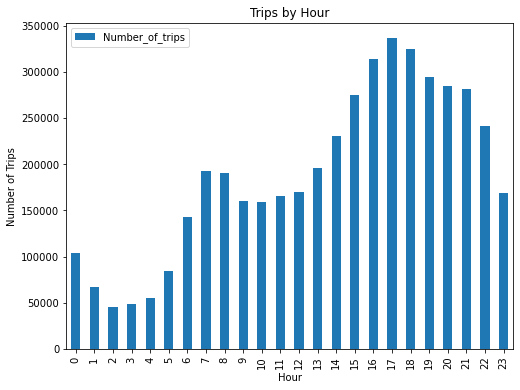

In [21]:
df_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

Analysing the Hour results

In [24]:
#highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_Number_of_trips_hour

336190

In [25]:
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]
print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00,'.format(max_Number_of_trips_hour,max_hour))

The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00,


Trips by Month

In [31]:
#Grouping by Hour
df_month_grouped = df.groupby(['Month'],sort=False).count()

#sub DataFrame
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index)
df_month.head()

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275


Plotting

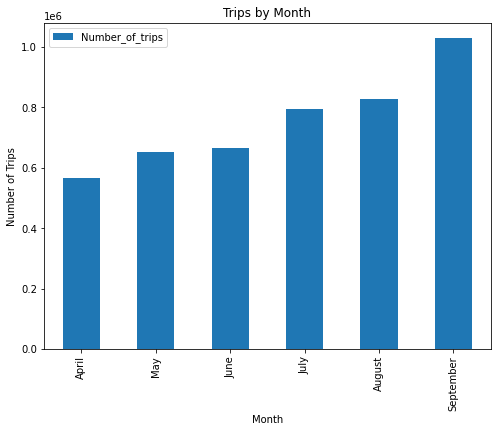

In [32]:
df_month.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

Analysing the Month results

We observe that the number of trips increases each month, with a peak increase between August and September

In [33]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)
print("The ratio increase from August to September is {} %.".format(ratio_month))

The ratio increase from August to September is 24 %.


Trips by Weekday

In [35]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Weekday'], sort=False).count()

#sub DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index)
df_weekday.head()

,Number_of_trips
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114


Plotting

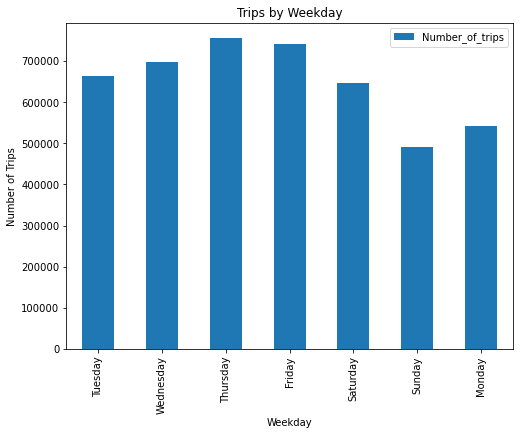

In [36]:
df_weekday.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

In [39]:
#highest number of trips by hour
min_Number_of_trips_weekday = min(df_weekday['Number_of_trips'])
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_Number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to the peak hour {}.'.format(min_Number_of_trips_weekday,min_weekday))

The lowest number of trips by weekday is 490180 trip, that corresponds to the peak hour Sunday.


In [40]:
#mean number of trips in weekened - Non working day
mean_Number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#mean number of trips in weekened - working day
mean_Number_of_trips_workday = (((df_weekday.loc['Saturday'] + df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday']) / 5).values)[0]

ratio_weekday = (((mean_Number_of_trips_workday - mean_Number_of_trips_weekend) / mean_Number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 42.4% higher than the mean number of trips during weekends.


Trips by day

In [41]:
#Grouping by Weekday
df_day_grouped = df.groupby(['Day']).count()

#sub DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index)
df_day.head()

,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


Plotting

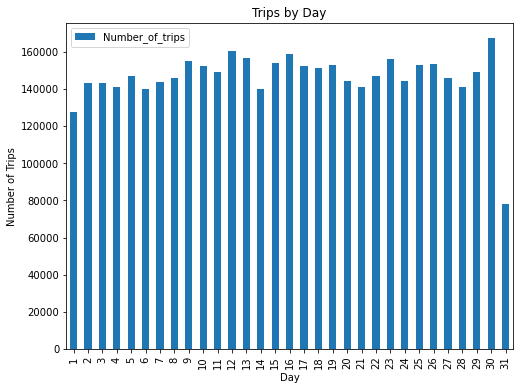

In [42]:
df_day.plot(kind='bar', figsize=(8,6))
plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

### Analysing the results

The number of trips for the day 31 is a lot less than the others because April, June and September have 30 days.

The day with the highest number of trips is the 30. There's not much variation from day to day.

Trips by Hour and Month

In [44]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#sub DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index)
df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [45]:
#Reseting the Index
df_hour_month.reset_index(inplace=True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [46]:
#Number of trips data
#Creating a Numpy array that includes the Number of trips data and reshaping it fit
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [47]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns=df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


Plotting

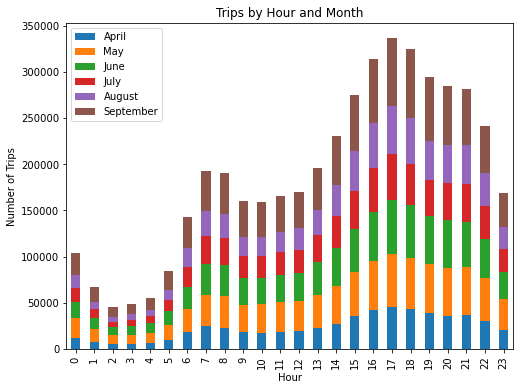

In [48]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')
plt.show()

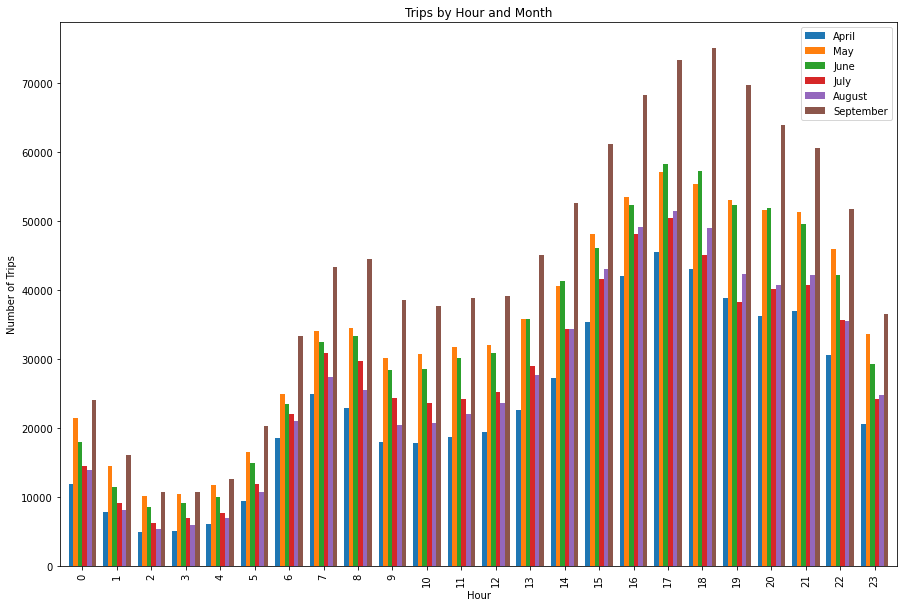

In [51]:
df_hour_month.plot(kind='bar', figsize=(15,10),width=0.8)
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')
plt.show()

Trips by Weekday and Hour

In [58]:
#Grouping by Hour and Month
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort=False).count()

#sub DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index)
df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

In [59]:
#Reseting the Index
df_weekday_hour.reset_index(inplace=True)


#Creating a Numpy array that includes the Number of trips data and reshaping it fit
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns=df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174


Plotting

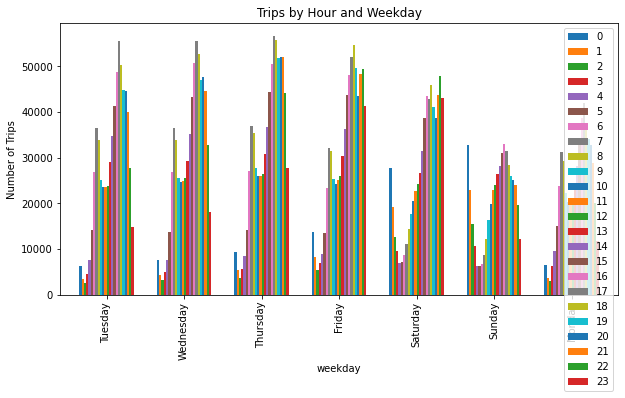

In [67]:
df_weekday_hour.plot(kind='bar', figsize=(10,5),width=0.7)
plt.xlabel('weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')
plt.show()

#### Analysing the results

We see that in working days there's a pulse at 7:00 and 8:00, it corresponds to the hour where the employees go to work. This pulse is not present on weekend days.

At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.

Trips by Weekday and Month

In [68]:
#Grouping by Hour and Month
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#sub DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index)
df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [69]:
#Reseting the Index
df_month_weekday.reset_index(inplace=True)


#Creating a Numpy array that includes the Number of trips data and reshaping it fit
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns=df['Weekday'].unique())
df_month_weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,91185,108631,85067,90303,77218,51251,60861
May,128921,133991,102990,56168,63846,76662,89857
June,79656,94655,88134,99654,115325,105056,81364
July,137454,147717,148439,102735,90260,76327,93189
August,148674,132225,110246,91633,107124,115256,124117


Plotting

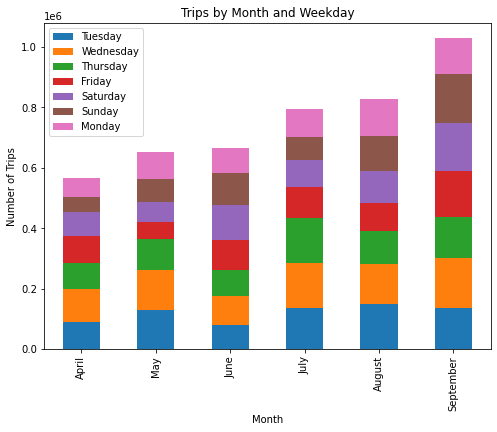

In [70]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')
plt.show()

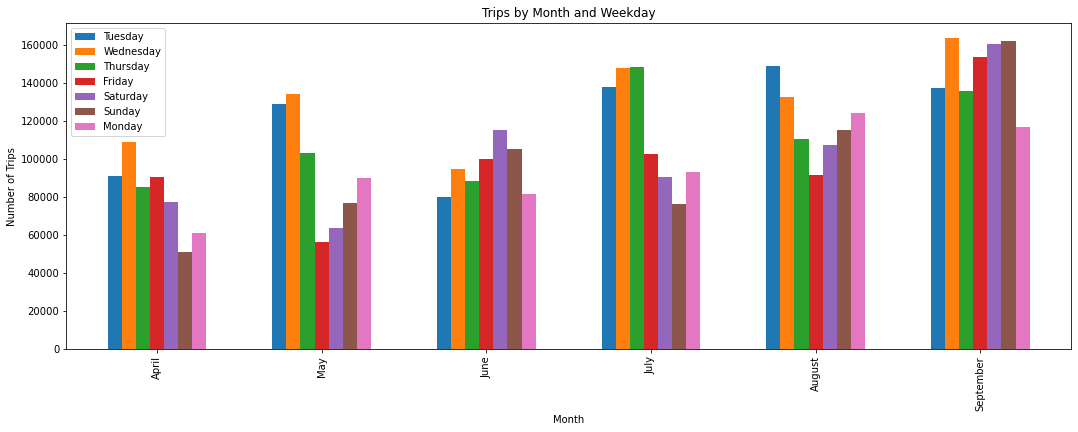

In [71]:
df_month_weekday.plot(kind='bar', figsize=(18,6),width=0.6)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')
plt.show()

Through our analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:

The peak demand hour 17:00.
The main customer category are workers.
An indicator of Uber's improvement from April to September.
People tend to use Uber to go to work around 7:00 and 8:00 on working days.
People tend to use Uber late at night (around midnight) during weekends.
We should investigate why people don't use uber on Mondays as much as they do on other working days